# Recommendations with IBM

In this notebook, you will be putting your recommendation skills to use on real data from the IBM Watson Studio platform. 


You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/rubrics/3325/view).  **Please save regularly.**

By following the table of contents, you will build out a number of different methods for making recommendations that can be used for different situations. 


## Table of Contents

I. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
II. [Rank Based Recommendations](#Rank)<br>
III. [User-User Based Collaborative Filtering](#User-User)<br>
IV. [Content Based Recommendations (EXTRA - NOT REQUIRED)](#Content-Recs)<br>
V. [Matrix Factorization](#Matrix-Fact)<br>
VI. [Extras & Concluding](#conclusions)

At the end of the notebook, you will find directions for how to submit your work.  Let's get started by importing the necessary libraries and reading in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import project_tests as t
import pickle

%matplotlib inline

df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [2]:
import seaborn as sns

In [3]:
# Show df_content to get an idea of the data
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

Before we do anything, we will do some basic data exloration like:

- check out the number of zeros
- check out the zero values
- check the shape of the dataframe
- check out dtypes with df.info()

In [4]:
df.isnull().sum()

article_id     0
title          0
email         17
dtype: int64

In [5]:
df.loc[df["email"].isnull()]

,article_id,title,email
25131,1016.0,why you should master r (even if it might even...,NaN
29758,1393.0,the nurse assignment problem,NaN
29759,20.0,working interactively with rstudio and noteboo...,NaN
29760,1174.0,breast cancer wisconsin (diagnostic) data set,NaN
29761,62.0,data visualization: the importance of excludin...,NaN
35264,224.0,"using apply, sapply, lapply in r",NaN
35276,961.0,beyond parallelize and collect,NaN
35277,268.0,sector correlations shiny app,NaN
35278,268.0,sector correlations shiny app,NaN
35279,268.0,sector correlations shiny app,NaN


In [6]:
df.shape

(45993, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45993 entries, 0 to 45992
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   article_id  45993 non-null  float64
 1   title       45993 non-null  object 
 2   email       45976 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [8]:
df_grb = df.groupby(by = ["email"]).count()[["article_id"]]

In [9]:
df_grb.sort_values(by= "article_id", ascending = False).head(20)

,article_id
email,
2b6c0f514c2f2b04ad3c4583407dccd0810469ee,364
77959baaa9895a7e2bdc9297f8b27c1b6f2cb52a,363
2f5c7feae533ce046f2cb16fb3a29fe00528ed66,170
a37adec71b667b297ed2440a9ff7dad427c7ac85,169
8510a5010a5d4c89f5b07baac6de80cd12cfaf93,160
f8c978bcf2ae2fb8885814a9b85ffef2f54c3c76,158
284d0c17905de71e209b376e3309c0b08134f7e2,148
18e7255ee311d4bd78f5993a9f09538e459e3fcc,147
d9032ff68d0fd45dfd18c0c5f7324619bb55362c,147


Text(0, 0.5, 'Count')

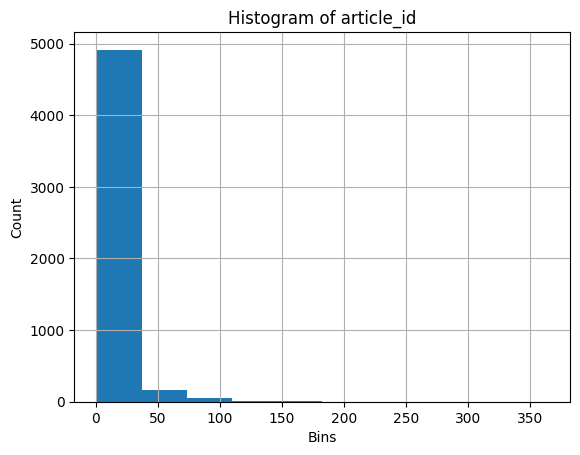

In [10]:

df_grb.hist()
plt.title("Histogram of article_id")
plt.xlabel("Bins")
plt.ylabel("Count")

It looks like the majority of user interacts with an article roughly 0-40 times. Anything above 40 is rather unlikely. We have to take a closer look at the big bin ~ (0-40) to see if the interaction in that bin is evenly distributed

In [11]:
# Create lead_days_category column
interaction_labels = pd.Series([
    "0-10",
    ">10-20",
    '>10-30',
    '>30-40',
    '>40-50',
    '>50-60',
    '>60-70',
    '>70-max',
    ])
df_grb["interaction_labels"] = pd.cut(
    df_grb["article_id"], 
    bins = [
    0,
    10, 
    20,
    30,
    40,
    50,
    60,
    70,
    df_grb["article_id"].max()
    ],
    labels = interaction_labels
    )

In [12]:
df_grb.sample(20)

,article_id,interaction_labels
email,,
5dfdb86787b3b88867f8e9497795d45d6b92d996,1,0-10
aa0c41154a3488609066fb8f3537e9587ec0428b,2,0-10
08c7ce33f345bda513c344f9a860966e73553d7f,12,>10-20
7e6c91489b24596e44ee84489a045b30aca2f3b5,3,0-10
05be791bd3751e72bcf5f3a9d51558b671d772d8,7,0-10
75b11547437d86c21fa34ecf3e15bb8ec4f79c69,58,>50-60
042dd3f6128f1b83a921288e525bce62ebeade5d,1,0-10
d93d60523de6dd37438ef5cee3dc9ff521d04513,13,>10-20
74aa708ee0cc0c44708207465c56788bf9cba7ae,2,0-10


In [13]:
df_grb["interaction_labels"].value_counts()

0-10       4028
>10-20      559
>10-30      233
>30-40      131
>70-max      69
>40-50       61
>50-60       45
>60-70       22
Name: interaction_labels, dtype: int64

It is now visible that the majortiy of interaction happens between 0-10 times

In [14]:
print("Maximum interaction with an article: {}".format(df_grb["article_id"].max()))
print("Minium interaction with an article: {}".format(df_grb["article_id"].min()))
print("Mean interaction with an article: {}".format(df_grb["article_id"].mean()))
print("Mode interaction with an article: {}".format(df_grb["article_id"].mode()))
print("Median interaction with an article: {}".format(df_grb["article_id"].median()))

Maximum interaction with an article: 364
Minium interaction with an article: 1
Mean interaction with an article: 8.930846930846931
Mode interaction with an article: 0    1
Name: article_id, dtype: int64
Median interaction with an article: 3.0


In [15]:
import numpy as np

In [16]:
q_1 = np.quantile(df_grb["article_id"].values, .25) # Q1: all values that are smaller then 1/4 of the values
q_2 = np.quantile(df_grb["article_id"].values, .50) #Q2: all values that 25% smaller then the mean
q_3 = np.quantile(df_grb["article_id"].values, .75) # Q3: all values that 25% bigger then the mean

In [17]:
print("Q1 quantile of arr : ", q_1) 
print("Q2 quantile of arr : ", q_2)
print("Q3 quantile of arr : ", q_3)

Q1 quantile of arr :  1.0
Q2 quantile of arr :  3.0
Q3 quantile of arr :  9.0


In [18]:
# Fill in the median and maximum number of user_article interactios below

median_val = df_grb["article_id"].median()
max_views_by_user =  df_grb["article_id"].max() # The maximum number of user-article interactions by any 1 user is 364.

In [19]:
max_views_by_user

364

`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

In [20]:
# Find and explore duplicate articles

In [21]:
df_content.loc[df_content["article_id"].duplicated(keep = False)].sort_values(by = "article_id")

,doc_body,doc_description,doc_full_name,doc_status,article_id
50,Follow Sign in / Sign up Home About Insight Da...,Community Detection at Scale,Graph-based machine learning,Live,50
365,Follow Sign in / Sign up Home About Insight Da...,During the seven-week Insight Data Engineering...,Graph-based machine learning,Live,50
221,* United States\r\n\r\nIBM® * Site map\r\n\r\n...,When used to make sense of huge amounts of con...,How smart catalogs can turn the big data flood...,Live,221
692,Homepage Follow Sign in / Sign up Homepage * H...,One of the earliest documented catalogs was co...,How smart catalogs can turn the big data flood...,Live,221
232,Homepage Follow Sign in Get started Homepage *...,"If you are like most data scientists, you are ...",Self-service data preparation with IBM Data Re...,Live,232
971,Homepage Follow Sign in Get started * Home\r\n...,"If you are like most data scientists, you are ...",Self-service data preparation with IBM Data Re...,Live,232
399,Homepage Follow Sign in Get started * Home\r\n...,Today’s world of data science leverages data f...,Using Apache Spark as a parallel processing fr...,Live,398
761,Homepage Follow Sign in Get started Homepage *...,Today’s world of data science leverages data f...,Using Apache Spark as a parallel processing fr...,Live,398
578,This video shows you how to construct queries ...,This video shows you how to construct queries ...,Use the Primary Index,Live,577
970,This video shows you how to construct queries ...,This video shows you how to construct queries ...,Use the Primary Index,Live,577


In [22]:
# Remove any rows that have the same article_id - only keep the first
print("Shape before dropping duplicates: {}]".format(df_content.shape))
df_content = df_content.drop_duplicates(subset="article_id", keep = "first")
print("Shape after dropping duplicates: {}".format(df_content.shape))

Shape before dropping duplicates: (1056, 5)]
Shape after dropping duplicates: (1051, 5)


`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

To find the number of unique articles that have an interaction with a user, we must first filter out articles that are in combination with the email duplicated

In [23]:
df.loc[df[["article_id","email"]].duplicated()]

,article_id,title,email
41,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
75,1429.0,use deep learning for image classification,3c2de1b0a92728aa53064a22ff7bd7319878ed95
95,1162.0,analyze energy consumption in buildings,d385b6c44711688ce2a33eb596495bf9243e1750
97,409.0,using github for project control in dsx,2b6c0f514c2f2b04ad3c4583407dccd0810469ee
99,1393.0,the nurse assignment problem,8dc8d7ec2356b1b106eb3d723f3c234e03ab3f1e
...,...,...,...
45972,588.0,tidyr 0.6.0,0f3f3b558c7a821ef18092c48ea924aff362ec53
45973,1398.0,total population by country,0f3f3b558c7a821ef18092c48ea924aff362ec53
45979,962.0,data visualization with r: scrum metrics,1b7a3f70a30b90837681376d48c1ae8832f9834b
45982,1324.0,ibm watson facebook posts for 2015,d21b998d7a4722310ceeaa3c6aaa181a36db2d73


In [24]:
print("Articles and emails that are duplicated: {}".format(len(df.loc[df[["article_id","email"]].duplicated()])))

Articles and emails that are duplicated: 12311


With `~`, we can filter out exactly the emails and articles that are not duplicated --> which are then the unique ones.

In [25]:
df.loc[~df[["article_id","email"]].duplicated()].groupby(by = ["email"]).count().sort_values(by = "article_id", ascending= False)[["article_id"]]

,article_id
email,
2b6c0f514c2f2b04ad3c4583407dccd0810469ee,135
77959baaa9895a7e2bdc9297f8b27c1b6f2cb52a,135
d9032ff68d0fd45dfd18c0c5f7324619bb55362c,101
c60bb0a50c324dad0bffd8809d121246baef372b,100
a37adec71b667b297ed2440a9ff7dad427c7ac85,97
...,...
1ab433bafebd7f8b6322c05def9b41e0f029ea83,1
8283f83275dbd8cc8a2dd4d35a25f4a86310afbd,1
c1ad3e68598e288e5df72275ba03444ee218aab8,1


In [26]:
unique_articles = df["article_id"].nunique() # The number of unique articles that have at least one interaction
total_articles = len(df_content)# The number of unique articles on the IBM platform
unique_users = df.nunique()["email"]# The number of unique users
user_article_interactions = df_grb["article_id"].sum() + len(df.loc[df["email"].isnull()]) # The number of user-article interactions

`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [27]:
df["article_id"].value_counts()

1429.0    937
1330.0    927
1431.0    671
1427.0    643
1364.0    627
         ... 
1344.0      1
984.0       1
1113.0      1
675.0       1
662.0       1
Name: article_id, Length: 714, dtype: int64

In [28]:
print("The most viewed article was 'article_id' == {} with {} views".format(df["article_id"].value_counts().index[0], df["article_id"].value_counts().values[0]))

The most viewed article was 'article_id' == 1429.0 with 937 views


In [29]:
most_viewed_article_id = str(df["article_id"].value_counts().index[0])# The most viewed article in the dataset as a string with one value following the decimal 
max_views = df["article_id"].value_counts().values[0]# The most viewed article in the dataset was viewed how many times?

In [30]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [31]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id, 
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles, 
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles 
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

Unlike in the earlier lessons, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

In [32]:
df["article_id"].value_counts()

1429.0    937
1330.0    927
1431.0    671
1427.0    643
1364.0    627
         ... 
1344.0      1
984.0       1
1113.0      1
675.0       1
662.0       1
Name: article_id, Length: 714, dtype: int64

In [33]:
df_content

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4
...,...,...,...,...,...
1051,PouchDB-find is a new API and syntax that allo...,PouchDB uses MapReduce as its default search m...,A look under the covers of PouchDB-find,Live,1046
1052,We compare discriminative and generative learn...,We compare discriminative and generative learn...,A comparison of logistic regression and naive ...,Live,1047
1053,"Essays about data, building products and boots...",In order to demystify some of the magic behind...,What I Learned Implementing a Classifier from ...,Live,1048
1054,NaN,Learn how to use IBM dashDB as data store for ...,Use dashDB with Spark,Live,1049


In [34]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 

    user_id
    
    '''

    top_articles  =list(df["title"].value_counts().index[0:n])
    
    
    return top_articles # Return the top article titles from df (not df_content)

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    top_articles = list(df["article_id"].value_counts().index[0:n])
 
    return top_articles # Return the top article ids

In [35]:
print(get_top_articles(10))
print(get_top_article_ids(10))

['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model']
[1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1170.0, 1162.0, 1304.0]


In [36]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

Your top_5 looks like the solution list! Nice job.
Your top_10 looks like the solution list! Nice job.
Your top_20 looks like the solution list! Nice job.


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

In [37]:
df.loc[df["user_id"] == 1].head(10)

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
268,1430.0,"using pixiedust for fast, flexible, and easier...",1
1143,732.0,rapidly build machine learning flows with dsx,1
1562,1429.0,use deep learning for image classification,1
1710,43.0,deep learning with tensorflow course by big da...,1
1712,109.0,tensorflow quick tips,1
2047,1232.0,country statistics: life expectancy at birth,1
3839,310.0,time series prediction using recurrent neural ...,1
4042,1293.0,finding optimal locations of new store using d...,1
4664,1406.0,uci: iris,1


Here we can see that the user `user_id` == `1` has interacted with the articles  `1430.0`, `732.0`, `43.0` etc. For each user and article to be a row, we have to work with groupby

In [38]:
df.groupby(by=["user_id","article_id"])["title"].count()

user_id  article_id
1        43.0          1
         109.0         1
         151.0         1
         268.0         1
         310.0         2
                      ..
5146     1394.0        1
         1416.0        1
5147     233.0         1
5148     1160.0        1
5149     16.0          1
Name: title, Length: 33682, dtype: int64

.groupby brings us closer to our desired solution.
- gives us each user in a row --> this is what we want.
- Each article is not yet in each column- 
- when an interaction happened, we want there to be a `1`

In [39]:
df.groupby(by=["user_id","article_id"])["title"].apply(lambda x:1)

user_id  article_id
1        43.0          1
         109.0         1
         151.0         1
         268.0         1
         310.0         1
                      ..
5146     1394.0        1
         1416.0        1
5147     233.0         1
5148     1160.0        1
5149     16.0          1
Name: title, Length: 33682, dtype: int64

.apply(lambda x:1) seems to return a `1` when a user has interacted with an article. Now we only have to each article in one column. This can be done with .unstack().

In [40]:
df.groupby(by=["user_id","article_id"])["title"].apply(lambda x:1).unstack()

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let us put all this in a function.

In [41]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    # Fill in the function here
    user_item = df.groupby(by=["user_id","article_id"])["title"].apply(lambda x:1).unstack()
    user_item = user_item.fillna(value=0)
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)

In [42]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

Use the tests to test your function.

Code from [22. The Cold Start Problem Solution](https://learn.udacity.com/nanodegrees/nd025/parts/cd0019/lessons/ls11960/concepts/01bc0361-2c14-4da5-8267-3fa13459b3d9). 


To get the similarity of each user to another user, we have to work with the .dot function


In [43]:
# Take the dot product to obtain the similarity of each user to another user
user_item.dot(np.transpose(user_item))

user_id,1,2,3,4,5,6,7,8,9,10,...,5140,5141,5142,5143,5144,5145,5146,5147,5148,5149
user_id,,,,,,,,,,,,,,,,,,,,,
1,36.0,2.0,6.0,3.0,0.0,4.0,1.0,6.0,4.0,7.0,...,7.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.0,6.0,1.0,3.0,0.0,2.0,0.0,1.0,2.0,4.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,6.0,1.0,40.0,5.0,1.0,7.0,1.0,5.0,2.0,5.0,...,7.0,0.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0
4,3.0,3.0,5.0,26.0,3.0,8.0,0.0,8.0,1.0,4.0,...,6.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0
5,0.0,0.0,1.0,3.0,3.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
5146,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0
5147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
# safe it in a variable
dot_users = user_item.dot(np.transpose(user_item))

In [45]:
dot_users[10].sort_values(ascending = False)

user_id
10      19.0
3354    17.0
3697    15.0
49      15.0
3764    14.0
        ... 
2254     0.0
2255     0.0
2256     0.0
2257     0.0
5149     0.0
Name: 10, Length: 5149, dtype: float64

In [46]:
#if you want just the ids of these people, you can simply do .index
dot_users[10].sort_values(ascending = False).index

Int64Index([  10, 3354, 3697,   49, 3764,   98, 3622,  322,   23, 3782,
            ...
            2247, 2249, 2250, 2252, 2253, 2254, 2255, 2256, 2257, 5149],
           dtype='int64', name='user_id', length=5149)

In [47]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    dot_users = user_item.dot(np.transpose(user_item))
    # sort by similarity
    similiar_users = dot_users[user_id].sort_values(ascending = False)

    # create list of just the ids
    most_similar_users = list(similiar_users.index)

    # remove the own user's id
    most_similar_users.remove(user_id)

    return most_similar_users # return a list of the users in order from most to least similar
        

In [48]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 23, 3782, 203, 4459, 3870, 131, 4201, 46, 5041]
The 5 most similar users to user 3933 are: [1, 23, 3782, 203, 4459]
The 3 most similar users to user 46 are: [4201, 3782, 23]


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user. 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45993 entries, 0 to 45992
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   article_id  45993 non-null  float64
 1   title       45993 non-null  object 
 2   user_id     45993 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [50]:
#convert article_id to string
df["article_id"] = df["article_id"].astype(str)

In [51]:
list(set(df.loc[df["article_id"].isin(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])]["title"]))

['use xgboost, scikit-learn & ibm watson machine learning apis',
 'use r dataframes & ibm watson natural language understanding',
 'gosales transactions for naive bayes model',
 'build a python app on the streaming analytics service',
 'healthcare python streaming application demo',
 'using deep learning to reconstruct high-resolution audio']

In [52]:
#shows me who has interacted with the article 0.0
user_item.loc[user_item[0.0] == 1]

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
233,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
495,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
785,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1051,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1347,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2992,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3216,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#shows me user_id = 233
user_item.loc[233]

article_id
0.0       1.0
2.0       0.0
4.0       0.0
8.0       0.0
9.0       0.0
         ... 
1440.0    0.0
1441.0    0.0
1442.0    0.0
1443.0    0.0
1444.0    0.0
Name: 233, Length: 714, dtype: float64

In [54]:
#shows me with what articles user_id == 233 has interacted
user_item.loc[233][user_item.loc[233] == 1]

article_id
0.0       1.0
336.0     1.0
427.0     1.0
583.0     1.0
761.0     1.0
1271.0    1.0
1368.0    1.0
1401.0    1.0
1429.0    1.0
Name: 233, dtype: float64

In [55]:
#shows me only the article_ids user = 233 has interacted with
ids = user_item.loc[20][user_item.loc[20] == 1].index.astype(str)

In [56]:
#gets me the title of this article
list(set(df.loc[df["article_id"].isin(ids)]["title"]))

['housing (2015): united states demographic measures',
 'use the cloudant-spark connector in python notebook',
 'self-service data preparation with ibm data refinery']

To make a recommendation, we first have to know which articles were seen by our user. This info is given by the get_user_articles() function

To find similiar users, we can use the find_similar_users() function

In [57]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    # Your code here

    article_names = list(set(df.loc[df["article_id"].isin(article_ids)]["title"]))
    
    return article_names # Return the article names associated with list of article ids


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Your code here

    #shows me only the article_ids user = 233 has interacted with
    article_ids = user_item.loc[user_id][user_item.loc[user_id] == 1].index.astype(str)
    
    article_names = list(set(df.loc[df["article_id"].isin(article_ids)]["title"]))


    
    return article_ids, article_names # return the ids and names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Your code here
    
    recs = []# recommendations to be made
    
    user_articles_seen = get_user_articles(user_id)[0] #seen by our user
    similiar_users = find_similar_users(user_id) # users similiar to our user

    #from: https://github.com/nikextens/Data_Scientist_Recommendations_with_IBM/blob/main/Recommendations_with_IBM.ipynb
    for user in similiar_users:
        similiar_user_articles_seen = get_user_articles(user)[0]
        articles_new_user = list(set(similiar_user_articles_seen) - set(user_articles_seen)) # remove seen articles
        articles_new_rec = list(set(articles_new_user) - set(recs))
        recs.extend(articles_new_rec)
        
        if len(recs) > m: 
            break
    recs = recs[:10]
    
    return recs   

In [58]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1

['deep forest: towards an alternative to deep neural networks',
 'the unit commitment problem',
 'the power of machine learning in spark',
 'spark-based machine learning tools for capturing word meanings',
 'dsx: hybrid mode',
 'aspiring data scientists! start to learn statistics with these 6 books!',
 'learn basics about notebooks and apache spark',
 'the 3 kinds of context: machine learning and the art of the frame',
 'got zip code data? prep it for analytics. – ibm watson data lab – medium',
 'gosales transactions for logistic regression model']

In [59]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

In [60]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''

    # compute similarity of each user to the provided user with .dot function
    dot_prod_users = user_item.dot(np.transpose(user_item))
    #get me a similarity series of only one user and sort the series
    similarity = dot_prod_users.loc[user_id].sort_values(ascending=False)
    # remove user_id
    similarity = similarity.drop(user_id) # remove user_id
    #convert the series to a dataframe and rename the column to 'similarity'
    df_similarity = similarity.to_frame(name = "similarity").reset_index()
   

    #get me the number of interactions
    df_number_of_interactions = df["user_id"].value_counts().to_frame().reset_index().rename(columns={'user_id': 'number_of_interactions', "index":  "user_id"})
    
    neighbors_df = df_similarity.merge(df_number_of_interactions, on = "user_id")
    neighbors_df = neighbors_df.rename(columns = {"user_id": "neighbour_id"})
    # sort the neighbors_df by the similarity and then by number of interactions
    neighbors_df = neighbors_df.sort_values(by=['similarity', 'number_of_interactions'], ascending = False)
    
    return neighbors_df # Return the dataframe specified in the doc_string


def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    
    # Your code here
    

    recs = []

    #get neighbors_df to loop through the users 
    neighbors_df = get_top_sorted_users(user_id)
    #get neighbour_ids
    neighbor_ids = list(neighbors_df["neighbour_id"])
    #get the articles seen be the user
    articles_id_from_user = get_user_articles(user_id)[0]

    for neighbor in neighbor_ids:
        #get the articles seen be a neighbour
        articles_neighbor = get_user_articles(neighbor)[0]
        # remove articles that have already been seen
        #from: https://www.geeksforgeeks.org/python-set-difference/
        articles_new_user = list(set(articles_neighbor) - set(articles_id_from_user)) 
        #remove articles that are already in the recs list
        articles_new_rec =  list(set(articles_new_user) - set(recs)) # remove articles that are already part of rec list
        #extend these addtitional articles to the recs list
        recs.extend(articles_new_rec)
        
        if len(recs) > m: 
            break
            
    # choose articles with the most total interactions
    if len(recs) < m:
        top_articles = get_top_articles_ids(m-len(recs))
        #from: https://www.geeksforgeeks.org/python-set-difference/
        top_articles_unseen = list(set(top_articles) - set(articles_id_user_id)) 
        articles_new_rec = list(set(top_articles_unseen) - set(recs)) 
        recs.extend(articles_new_rec)
            
    recs = recs[:10]
    rec_names = get_article_names(recs)  

    return recs, rec_names

In [61]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
['1304.0', '362.0', '142.0', '1336.0', '1331.0', '1411.0', '465.0', '939.0', '1154.0', '1357.0']

The top 10 recommendations for user 20 are the following article names:
['intentional homicide, number and rate per 100,000 population, by country', 'airbnb data for analytics: vienna listings', 'overlapping co-cluster recommendation algorithm (ocular)', 'dsx: hybrid mode', 'uci: white wine quality', 'learn basics about notebooks and apache spark', 'neural networks for beginners: popular types and applications', 'deep learning from scratch i: computational graphs', 'introduction to neural networks, advantages and applications', 'gosales transactions for logistic regression model']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [62]:
get_top_sorted_users(user_id = 131)["neighbour_id"].iloc[10]

3910

In [63]:
### Tests with a dictionary of results

user1_most_sim = get_top_sorted_users(user_id = 1)["neighbour_id"].iloc[0] # Find the user that is most similar to user 1 
user131_10th_sim = get_top_sorted_users(user_id = 131)["neighbour_id"].iloc[9]# Find the 10th most similar user to user 131

In [64]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}

t.sol_5_test(sol_5_dict)

This all looks good!  Nice job!


`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

When a new user joins to a plattform where we do not have any data, it is referred to as the *cold start problem*. Because the user does have any ratings, it is impossible to use collaborative filtering methods to make recommendations.

In this case, you could make recommendations based on top articles with the function `get_top_articles`.

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [65]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 
new_user_recs = get_top_article_ids(10, df)



In [66]:
assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")

That's right!  Nice job!


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations (EXTRA - NOT REQUIRED)</a>

Another method we might use to make recommendations is to perform a ranking of the highest ranked articles associated with some term.  You might consider content to be the **doc_body**, **doc_description**, or **doc_full_name**.  There isn't one way to create a content based recommendation, especially considering that each of these columns hold content related information.  

`1.` Use the function body below to create a content based recommender.  Since there isn't one right answer for this recommendation tactic, no test functions are provided.  Feel free to change the function inputs if you decide you want to try a method that requires more input values.  The input values are currently set with one idea in mind that you may use to make content based recommendations.  One additional idea is that you might want to choose the most popular recommendations that meet your 'content criteria', but again, there is a lot of flexibility in how you might make these recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [67]:
def make_content_recs():
    '''
    INPUT:
    
    OUTPUT:
    
    '''

`2.` Now that you have put together your content-based recommendation system, use the cell below to write a summary explaining how your content based recommender works.  Do you see any possible improvements that could be made to your function?  Is there anything novel about your content based recommender?

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

**Write an explanation of your content based recommendation system here.**

`3.` Use your content-recommendation system to make recommendations for the below scenarios based on the comments.  Again no tests are provided here, because there isn't one right answer that could be used to find these content based recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [68]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook. 

In [69]:
# Load the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')

In [70]:
# quick look at the matrix
user_item_matrix.head()

article_id,0.0,100.0,1000.0,1004.0,1006.0,1008.0,101.0,1014.0,1015.0,1016.0,...,977.0,98.0,981.0,984.0,985.0,986.0,990.0,993.0,996.0,997.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` In this situation, you can use Singular Value Decomposition from [numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) on the user-item matrix.  Use the cell to perform SVD, and explain why this is different than in the lesson.

In [71]:
# Perform SVD on the User-Item Matrix Here

u, s, vt = np.linalg.svd(user_item_matrix, full_matrices=True)

In [72]:
user_item_matrix.isnull().sum()

article_id
0.0       0
100.0     0
1000.0    0
1004.0    0
1006.0    0
         ..
986.0     0
990.0     0
993.0     0
996.0     0
997.0     0
Length: 714, dtype: int64

**Provide your response here.**

The user_item_matrix does not have NaN values. It either has:

- `1`: the user has read the article or 
- `0`: the user did not read the article.

In the [udacity class](https://learn.udacity.com/nanodegrees/nd025/parts/cd0019/lessons/ls11960/concepts/31c5c850-b614-4c59-932e-3dbfee77aea8), we had to use FunkSVD as we had to deal with missing values. This technique is especially useful for matrices with lots of NaN. 


`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how the accuracy improves as we increase the number of latent features.

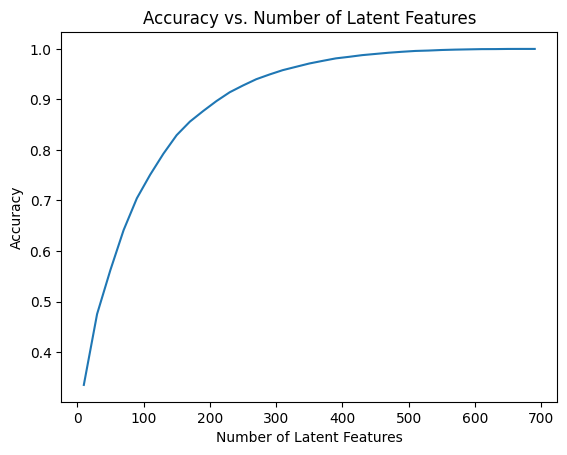

In [73]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations.  Instead, we might split our dataset into a training and test set of data, as shown in the cell below.  

Use the code from question 3 to understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below: 

* How many users can we make predictions for in the test set?  
* How many users are we not able to make predictions for because of the cold start problem?
* How many articles can we make predictions for in the test set?  
* How many articles are we not able to make predictions for because of the cold start problem?

In [74]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Your code here
    

    # Your code here
    #a user-item matrix of the training dataframe can simply be done by using the create_user_item_matrix function and df_train as an argument
    user_item_train = create_user_item_matrix(df_train)
    #a user-item matrix of the test dataframe can simply be done by using the create_user_item_matrix function and df_test as an argument
    user_item_test = create_user_item_matrix(df_test)
    #the test_idx can be fetched with .index
    test_idx = user_item_test.index
    #the test articles can be fetched with .columns
    test_arts = user_item_test.columns


    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [75]:
user_item_test

article_id,0.0,100.0,1000.0,1006.0,1008.0,101.0,1014.0,1016.0,1017.0,1018.0,...,973.0,975.0,977.0,98.0,981.0,986.0,990.0,993.0,996.0,997.0
user_id,,,,,,,,,,,,,,,,,,,,,
2917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
print("Shape of user item matrix train {}".format(user_item_train.shape))
print("Shape of user item matrix test {}".format(user_item_test.shape))
print("Number of test ids {}: ".format(len(test_idx)))
print("Number of test articles {}".format(len(test_arts)))

Shape of user item matrix train (4487, 714)
Shape of user item matrix test (682, 574)
Number of test ids 682: 
Number of test articles 574


In [77]:
#get me all users of test_idx that are not in user_item_train.index. For these ones, we are not able to make a prediction
not_predictiable_test = len(set(test_idx)- set(user_item_train.index))
print(not_predictiable_test)

predictable = user_item_test.shape[0] - not_predictiable_test
print(predictable)

predictable_test_articles = len(test_arts)
print(predictable_test_articles)

not_predictiable_articles = len(set(test_arts) - set(user_item_train.columns))
print(not_predictiable_articles)

662
20
574
0


In [78]:
# Replace the values in the dictionary below
a = 662 
b = 574 
c = 20 
d = 0 


sol_4_dict = {
    'How many users can we make predictions for in the test set?': c, # letter here, 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a, # letter here, 
    'How many articles can we make predictions for in the test set?':  b, # letter here,
    'How many articles in the test set are we not able to make predictions for because of the cold start problem?': d # letter here
}

t.sol_4_test(sol_4_dict)

Awesome job!  That's right!  All of the test articles are in the training data, but there are only 20 test users that were also in the training set.  All of the other users that are in the test set we have no data on.  Therefore, we cannot make predictions for these users using SVD.


`5.` Now use the **user_item_train** dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the **user_item_test** dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data. This will require combining what was done in questions `2` - `4`.

Use the cells below to explore how well SVD works towards making predictions for recommendations on the test data.  

In [79]:
# fit SVD on the user_item_train matrix
#find Us, S, and V
u_train, s_train, vt_train = np.linalg.svd(user_item_train) # fit svd similar to above then use the cells below

In [80]:
# Use these cells to see how well you can use the training 
# decomposition to predict on test data
print(u_train.shape) #Unitary array: same size as user_item_train.shape[0]
print(s_train.shape) #Vector: same as user_item_train.shape[1]
print(vt_train.shape) #Unitary array:same size as user_item_train.shape[1]

(4487, 4487)
(714,)
(714, 714)


In [81]:
#give me a user_id list that are both in user_item_train.index & test_idx --> for these I can make predictions
common_idx_train = user_item_train.index.isin(test_idx)

common_articles_train = user_item_train.columns
common_articles_train = common_articles_train.isin(test_arts)


#define u_test
u_test = u_train[common_idx_train] #
#define vt_test
vt_test = vt_train[:, common_articles_train]

#from Q3
num_latent_feats = np.arange(10,700+10,20)
sum_errs_train = []
sum_errs_test = []

#get me user_ids that are both in user_item_train  & test_idx --> for these we can make predictions in the test set
common_idx = list(set(user_item_train.index) & set(test_idx))
#get me a user_item df with only thsse common user_ids 
user_item_test_adj = user_item_test.loc[common_idx]


for k in num_latent_feats:

    # restructure with k latent features, #from Q3
    s_train_new, u_train_new, vt_train_new = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_test, vt_test = u_test[:, :k], vt_test[:k, :]
      
    # take dot product, #from Q3
    user_item_est_train = np.around(np.dot(np.dot(u_train_new, s_train_new), vt_train_new))    
    user_item_est_test = np.around(np.dot(np.dot(u_test, s_train_new), vt_test))
    
    # restructure with k latent features
    u_test= u_train[user_item_train.index.isin(user_item_test.index), :]
    vt_test = vt_train[:, user_item_train.columns.isin(user_item_test.columns)]  
    
    # compute error for each prediction to actual value, #from Q3
    diffs_train = np.subtract(user_item_train, user_item_est_train)
    diffs_test = np.subtract(user_item_test_adj, user_item_est_test)   
    
    # total errors and keep track of them, #from Q3
    err_train = np.sum(np.sum(np.abs(diffs_train)))
    sum_errs_train.append(err_train)

    err_test = np.sum(np.sum(np.abs(diffs_test)))
    sum_errs_test.append(err_test)   


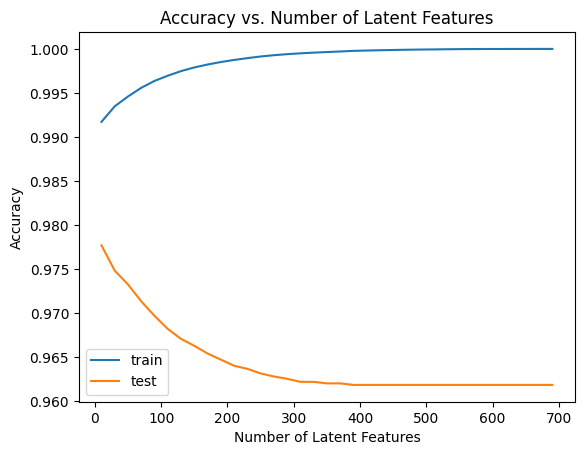

In [82]:
#plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.plot(num_latent_feats, 1 - np.array(sum_errs_train)/(user_item_train.shape[0]*user_item_train.shape[1]), label='train')
plt.plot(num_latent_feats, 1 - np.array(sum_errs_test)/(user_item_test_adj.shape[0]*user_item_test_adj.shape[1]), label = 'test');
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');
plt.legend();

`6.` Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results, discuss what you might do to determine if the recommendations you make with any of the above recommendation systems are an improvement to how users currently find articles? 

**Your response here.**

The figure above shows that the accurary of the **training data** increases with the number of latent features. The accuracy of the **test data** decreases from ~0.977 to ~0.962. When the number of latent features is around 300, the accuracy remains stable. 

When the accuracy increases with the number of features, the model is probably overfitting. 

Futhermore, the number of ids fitted was only 20, any result from such small group should be interpreted carefully.

<a id='conclusions'></a>
### Extras
Using your workbook, you could now save your recommendations for each user, develop a class to make new predictions and update your results, and make a flask app to deploy your results.  These tasks are beyond what is required for this project.  However, from what you learned in the lessons, you certainly capable of taking these tasks on to improve upon your work here!


## Conclusion

> Congratulations!  You have reached the end of the Recommendations with IBM project! 




In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb'])

Traceback (most recent call last):
  File "/home/tobias_groeschner/miniconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/tobias_groeschner/miniconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/nbconvert/__main__.py", line 4, in <module>
    main()
  File "/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/jupyter_core/application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
    app.start()
  File "/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-dat

1